# Python-MLearning: Loan Data using Logistic Regression (LR) and Sklearn
## PCA REDUCED DIMENSION MODELING
By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; September 10, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>

# I IMPORT REQUIRED PACKAGES

In [1]:
import os
from datetime import datetime
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

#sklearn.linear_model.LogisticRegression
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

# II FULL DATASET WITH MISSING VALUES FILLED

# 1 LOADING DATA

In [2]:
#Checking working directory
# import os
os.getcwd()

'C:\\Users\\Alvaro\\Documents\\R-Python-Projects_April042018\\Python_Projects\\Machine-Learning\\LogisticRegression\\Logistic3_Loan'

In [3]:
#List files in a directory
os.listdir()

['.ipynb_checkpoints',
 'Backup',
 'For REDUCED Dataset model development.txt',
 'How to plot multiple ROC curves in one plot with legend and AUC scores in python_ - Stack Overflow.pdf',
 'Link to  Logistic stuff here.txt',
 'Links to LR3 GITHUBE and Nbviewer.txt',
 'LoanFree_LRModel.csv',
 'LoanFull.csv',
 'Loan_FullProcess.csv',
 'Loan_LRModel.csv',
 'Loan_Prediction',
 'Log_ROC.png',
 'Material Support',
 'Multiple classifiers_ accuracy tests, ROC curves _ Kaggle.pdf',
 'PYTHON-MLearning_LR1_Introduction.ipynb',
 'PYTHON-MLearning_LR2_OPTIMAL-RFECV_Final.ipynb',
 'PYTHON-MLearning_LR3_Classical.ipynb',
 'PYTHON-MLearning_LR3_Exploratory_FEngineering_Final.ipynb',
 'PYTHON-MLearning_LR3_PCA.ipynb',
 'Summaries.xlsx',
 'To Put in the GitHube Menu.txt',
 'Visual']

In [4]:
# read csv (comma separated value) into data
df=pd.read_csv('Loan_LRModel.csv')
print(df.shape)
print(df.columns)

(981, 15)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'TotalIncome_log', 'LoanAmount_log', 'LoanIncome_log',
       'Property_Area_0', 'Property_Area_1', 'Property_Area_2'],
      dtype='object')


In [8]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 15 columns):
Loan_ID             981 non-null object
Gender              981 non-null int64
Married             981 non-null int64
Dependents          981 non-null int64
Education           981 non-null int64
Self_Employed       981 non-null int64
Loan_Amount_Term    981 non-null float64
Credit_History      981 non-null float64
Loan_Status         981 non-null int64
TotalIncome_log     981 non-null float64
LoanAmount_log      981 non-null float64
LoanIncome_log      981 non-null float64
Property_Area_0     981 non-null int64
Property_Area_1     981 non-null int64
Property_Area_2     981 non-null int64
dtypes: float64(5), int64(9), object(1)
memory usage: 115.0+ KB


(None, (981, 15))

In [25]:
cat_vars=['Gender', 'Dependents', 'Self_Employed']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [26]:
data_final=df[to_keep]
data_final.columns.values, data_final.dtypes, data_final.shape

(array(['Loan_ID', 'Married', 'Education', 'Loan_Amount_Term',
        'Credit_History', 'Loan_Status', 'TotalIncome_log',
        'LoanAmount_log', 'LoanIncome_log', 'Property_Area_0',
        'Property_Area_1', 'Property_Area_2'], dtype=object),
 Loan_ID              object
 Married               int64
 Education             int64
 Loan_Amount_Term    float64
 Credit_History      float64
 Loan_Status           int64
 TotalIncome_log     float64
 LoanAmount_log      float64
 LoanIncome_log      float64
 Property_Area_0       int64
 Property_Area_1       int64
 Property_Area_2       int64
 dtype: object,
 (769, 12))

In [27]:
y_data = data_final['Loan_Status']
vars =['Loan_Status','Loan_ID']
X_data = data_final.drop(vars, axis=1)                  
df.shape, y_data.shape, X_data.shape

((769, 15), (769,), (769, 10))

# 2 MODELING

# What About Train and Validation Datasets?

In [28]:
#Divide X_data and y_data into train and test data
X_train, X_test, y_train,  y_test = train_test_split(X_data, y_data, test_size=0.30, random_state=0,
                                                                                      stratify= y_data, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((538, 10), (231, 10), (538,), (231,))

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

X_train.shape, X_test.shape

((538, 10), (231, 10))

# What About Reduce Dimension Using PCA?

## Reduce dimension general analysis

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
data_sc = sc.fit_transform(X_data)  

#Reduce dimension into 95% information
pca = PCA(0.95)
data_pca = pca.fit_transform(data_sc)
data_sc.shape, data_pca.shape

((769, 10), (769, 8))

Text(0,0.5,'cumulative explained variance')

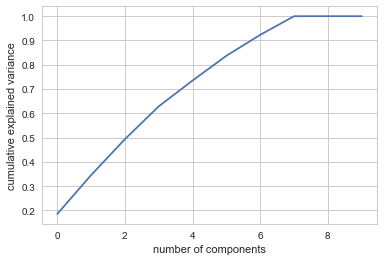

In [31]:
#plot to visualize % of total variance accumulated by the components
pca = PCA().fit(data_sc)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0.5,1,'Projection on the Two First Principal Components ')

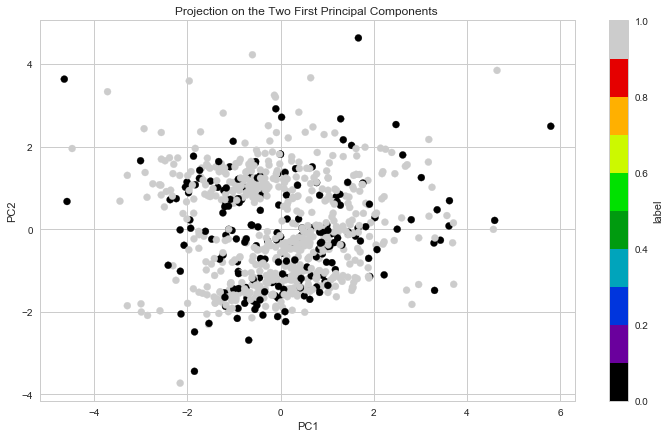

In [32]:
#plot of two first components
plt.subplots(nrows=1, ncols=1, figsize=(12,7))
plt.scatter(data_pca[:,0], data_pca[:,1], c=y_data, cmap=plt.get_cmap('nipy_spectral', 10))
plt.colorbar(label='label')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection on the Two First Principal Components ')
#cbar = plt.colorbar()
#cbar.set_label('Time [ps]')

## Reduce dimension into 95% information

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test)
data_pca = pca.transform(X_data)

X_train_pca.shape, X_test_pca.shape, data_pca.shape

((538, 10), (231, 10), (769, 10))

# What About Building the Model?

## Checking Global Model Significance

In [34]:
from __future__ import print_function
import statsmodels.api as sm
import pandas.tseries
from pandas.core import datetools
glm_binom = sm.GLM(y_data, data_pca, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Loan_Status   No. Observations:                  769
Model:                            GLM   Df Residuals:                      760
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -270.24
Date:                Tue, 11 Sep 2018   Deviance:                       540.47
Time:                        18:44:58   Pearson chi2:                     769.
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2914      0.157     -1.860      0.063      -0.598       0.016
x2             0.5206      0.202      2.582      0.0

For at least four of the predictor variables is less than 0.05. Therefore, assuming a classic risk of 5% we can accept that the model is <u><i>globally valid</i></u> since most of the predictor variables are significantly valid for the model.

## What values for the model's hyperparameters would be selected?

In [35]:
# Import necessary modules
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

startTime = datetime.now()
# Setup the parameters and distributions to sample from: param_dist
param_grid = {'C': np.arange(1e-05, 3, 0.1),      
           "solver" : ['newton-cg', 'lbfgs']}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')
gs.fit(X_train_pca, y_train)
#results = gs.cv_results_
print ('Total running time (H: M: S. ThS)', datetime.now()-startTime, 'seconds.')

Total running time (H: M: S. ThS) 0:00:15.875908 seconds.


In [36]:
# Print the tuned parameters and score
print('='*20)
print("best estimator: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)

best estimator: LogisticRegression(C=0.10001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)
best params: {'C': 0.10001, 'solver': 'newton-cg'}
best score: 0.8773234200743495


## Using best parameters to Fit, Evaluate, and Make predictions

### Fitting the Model

In [37]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=0.10001, solver='newton-cg', n_jobs=-1, random_state=0)
logreg.fit(X_train_pca, y_train)

LogisticRegression(C=0.10001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=0,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

### Evaluating the Model

In [38]:
# Evaluating LR model
print('With LR train datasets () accuracy is: ',round(logreg.score(X_train_pca,y_train),4)) # accuracy 

With LR train datasets () accuracy is:  0.8773


In [39]:
predictions = logreg.predict(X_test_pca)
print('Accuracy based on X_test_pca, y_test: ',accuracy_score(y_test, predictions))
print('')
print('Confusion Matrix:\n ',confusion_matrix(y_test, predictions))
print('With LR train datasets () accuracy is: ',round(logreg.score(X_train_pca,y_train),4)) # accuracy ',confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy based on X_test_pca, y_test:  0.8874458874458875

Confusion Matrix:
  [[ 34  24]
 [  2 171]]
With LR train datasets () accuracy is:  0.8773
             precision    recall  f1-score   support

          0       0.94      0.59      0.72        58
          1       0.88      0.99      0.93       173

avg / total       0.89      0.89      0.88       231



Precision, recall and f1-score are metrics to measure the accuracy of classification models. A general explanation can be got in [Wikipedia](https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers).

Based on LR testing datasets (X_test_pca, y_test), looks like we misclassified 26 clients, leaving us with a 88.85% accuracy rate  (with 89% precision and 89% recall). Meantime, With LR train datasets (X_train, y_train) accuracy is  87.73%

#### Getting Model's Beta Coefficients

In [41]:
# print the intercept and coefficients
print(logreg.intercept_)
print(logreg.coef_)

[1.25834876]
[[-1.27306066e-01  1.29422720e-01  3.38094117e-01  2.29662209e-02
  -1.01249778e-01 -1.32095707e+00  2.33642172e-01 -7.75171521e-02
  -1.46961553e-16 -1.47302695e-17]]


In [42]:
#feature_cols = data_final.columns.drop(['Loan_ID', 'Loan_Status'])
feature_cols = X_data.columns
feature_cols

Index(['Married', 'Education', 'Loan_Amount_Term', 'Credit_History',
       'TotalIncome_log', 'LoanAmount_log', 'LoanIncome_log',
       'Property_Area_0', 'Property_Area_1', 'Property_Area_2'],
      dtype='object')

In [43]:
##pair the feature names with the coefficients
list(zip(feature_cols,  logreg.coef_[0]))

[('Married', -0.12730606562421956),
 ('Education', 0.12942272016609305),
 ('Loan_Amount_Term', 0.3380941170240933),
 ('Credit_History', 0.022966220945207512),
 ('TotalIncome_log', -0.10124977806392518),
 ('LoanAmount_log', -1.3209570676498508),
 ('LoanIncome_log', 0.23364217244149643),
 ('Property_Area_0', -0.07751715206112861),
 ('Property_Area_1', -1.4696155316966337e-16),
 ('Property_Area_2', -1.47302694917959e-17)]

### Making Predictions

#### Based on the training dataset

The function cross_val_predict has a similar interface to cross_val_score, but returns, for each element in the input, the prediction that was obtained for that element when it was in the test set obtained from the partition over X_train (in our case).

In [44]:
predictions = cross_val_predict(logreg, X_train_pca, y_train, cv=10)
print('Prediction: {}', predictions)

Prediction: {} [1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1
 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1
 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 0 1 0

#### Based on the test dataset

Now we used the function predict which is regularly the one to be used to get the predictions on a new dataset. In our case, the new dataset is the X_test one.

In [47]:
# train your model using all data.
startTime = datetime.now()
logreg.fit(data_pca, y_data) 
print ('Total running time (H: M: S. ThS)', datetime.now()-startTime, 'seconds.')

Total running time (H: M: S. ThS) 0:00:02.084119 seconds.


In [45]:
predictions = logreg.predict(X_test_pca)
print('Prediction: {}', predictions)

Prediction: {} [1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1
 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1]


# III REDUCED DATASET WITHOUT MISSING VALUES

# 1 LOADING DATA

In [19]:
#Checking working directory
# import os
os.getcwd()

'C:\\Users\\Alvaro\\Documents\\R-Python-Projects_April042018\\Python_Projects\\Machine-Learning\\LogisticRegression\\Logistic3_Loan'

In [20]:
#List files in a directory
os.listdir()

['.ipynb_checkpoints',
 'Backup',
 'For REDUCED Dataset model development.txt',
 'How to plot multiple ROC curves in one plot with legend and AUC scores in python_ - Stack Overflow.pdf',
 'Link to  Logistic stuff here.txt',
 'Links to LR3 GITHUBE and Nbviewer.txt',
 'LoanFree_LRModel.csv',
 'LoanFull.csv',
 'Loan_FullProcess.csv',
 'Loan_LRModel.csv',
 'Loan_Prediction',
 'Log_ROC.png',
 'Material Support',
 'Multiple classifiers_ accuracy tests, ROC curves _ Kaggle.pdf',
 'PYTHON-MLearning_LR1_Introduction.ipynb',
 'PYTHON-MLearning_LR2_OPTIMAL-RFECV_Final.ipynb',
 'PYTHON-MLearning_LR3_Classical.ipynb',
 'PYTHON-MLearning_LR3_Exploratory_FEngineering_Final.ipynb',
 'PYTHON-MLearning_LR3_PCA.ipynb',
 'Summaries.xlsx',
 'To Put in the GitHube Menu.txt',
 'Visual']

In [21]:
# read csv (comma separated value) into data
df=pd.read_csv('LoanFree_LRModel.csv')
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'TotalIncome_log', 'LoanAmount_log', 'LoanIncome_log',
       'Property_Area_0', 'Property_Area_1', 'Property_Area_2'],
      dtype='object')

In [46]:
cat_vars=['Gender', 'Dependents', 'Self_Employed']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [47]:
data_final=df[to_keep]
data_final.columns.values, data_final.dtypes, data_final.shape

(array(['Loan_ID', 'Married', 'Education', 'Loan_Amount_Term',
        'Credit_History', 'Loan_Status', 'TotalIncome_log',
        'LoanAmount_log', 'LoanIncome_log', 'Property_Area_0',
        'Property_Area_1', 'Property_Area_2'], dtype=object),
 Loan_ID              object
 Married               int64
 Education             int64
 Loan_Amount_Term    float64
 Credit_History      float64
 Loan_Status           int64
 TotalIncome_log     float64
 LoanAmount_log      float64
 LoanIncome_log      float64
 Property_Area_0       int64
 Property_Area_1       int64
 Property_Area_2       int64
 dtype: object,
 (769, 12))

In [48]:
y_data = data_final['Loan_Status']
vars =['Loan_Status','Loan_ID']
X_data = data_final.drop(vars, axis=1)                  
df.shape, y_data.shape, X_data.shape

((769, 15), (769,), (769, 10))

# 2 MODELING

# What About Train and Validation Datasets?

In [49]:
#Divide X_data and y_data into train and test data
X_train, X_test, y_train,  y_test = train_test_split(X_data, y_data, test_size=0.30, random_state=0,
                                                                                      stratify= y_data, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((538, 10), (231, 10), (538,), (231,))

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

X_train.shape, X_test.shape

((538, 10), (231, 10))

# What About Reduce Dimension Using PCA?

## Reduce dimension general analysis

In [51]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
data_sc = sc.fit_transform(X_data)  

In [52]:
#Reduce dimension into 95% information
pca = PCA(0.95)
data_pca = pca.fit_transform(data_sc)
data_sc.shape, data_pca.shape

((769, 10), (769, 8))

Text(0,0.5,'cumulative explained variance')

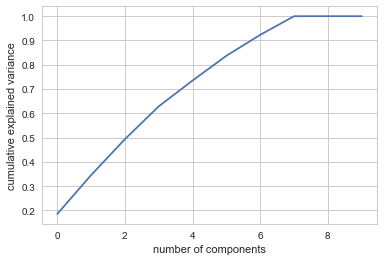

In [53]:
#plot to visualize % of total variance accumulated by the components
pca = PCA().fit(data_sc)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

Text(0.5,1,'Projection on the Two First Principal Components ')

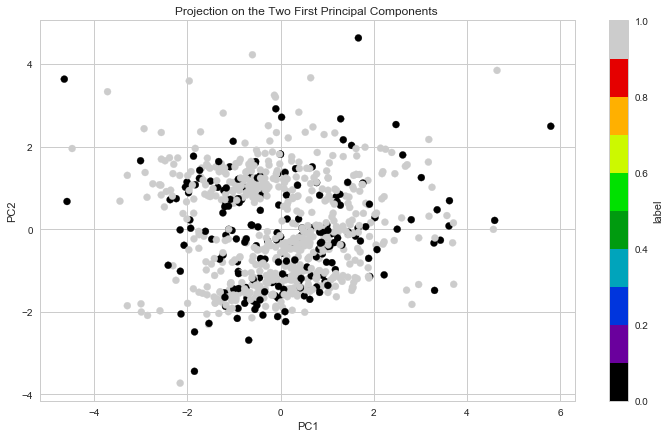

In [54]:
#plot of two first components
plt.subplots(nrows=1, ncols=1, figsize=(12,7))
plt.scatter(data_pca[:,0], data_pca[:,1], c=y_data, cmap=plt.get_cmap('nipy_spectral', 10))
plt.colorbar(label='label')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection on the Two First Principal Components ')
#cbar = plt.colorbar()
#cbar.set_label('Time [ps]')


## Reduce dimension into 95% information

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test)
data_pca = pca.transform(X_data)

X_train_pca.shape, X_test_pca.shape, data_pca.shape

((538, 10), (231, 10), (769, 10))

# What About Building the Model?

## Checking Global Model Significance¶

In [56]:
from __future__ import print_function
import statsmodels.api as sm
import pandas.tseries
from pandas.core import datetools
glm_binom = sm.GLM(y_data, data_pca, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            Loan_Status   No. Observations:                  769
Model:                            GLM   Df Residuals:                      760
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -270.24
Date:                Tue, 11 Sep 2018   Deviance:                       540.47
Time:                        19:12:27   Pearson chi2:                     769.
No. Iterations:                     6                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2914      0.157     -1.860      0.063      -0.598       0.016
x2             0.5206      0.202      2.582      0.0

For at least four of the predictor variables is less than 0.05. Therefore, assuming a classic risk of 5% we can accept that the model is <u><i>globally valid</i></u> since most of the predictor variables are significantly valid for the model.

## What values for the model's hyperparameters would be selected?

In [57]:
# Import necessary modules
from scipy.stats import randint
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

startTime = datetime.now()
# Setup the parameters and distributions to sample from: param_dist
param_grid = {'C': np.arange(1e-05, 3, 0.1),      
           "solver" : ['newton-cg', 'lbfgs']}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')
gs.fit(X_train_pca, y_train)
#results = gs.cv_results_
print ('Total running time (H: M: S. ThS)', datetime.now()-startTime, 'seconds.')


Total running time (H: M: S. ThS) 0:00:46.228644 seconds.


In [58]:
# Print the tuned parameters and score
print('='*20)
print("best estimator: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)


best estimator: LogisticRegression(C=0.10001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)
best params: {'C': 0.10001, 'solver': 'newton-cg'}
best score: 0.8773234200743495


## Using best parameters to Fit and Evaluate the model

### Fitting the Model

In [59]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=0.10001, solver='newton-cg', n_jobs=-1, random_state=0)
logreg.fit(X_train_pca, y_train)

LogisticRegression(C=0.10001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=-1, penalty='l2', random_state=0,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

## Evaluating the Model

In [60]:
# Evaluating LR model
print('With LR train datasets () accuracy is: ',round(logreg.score(X_train_pca,y_train),4)) # accuracy 

With LR train datasets () accuracy is:  0.8773


In [61]:
predictions = logreg.predict(X_test_pca)
print('Accuracy based on X_test_pca, y_test: ',accuracy_score(y_test, predictions))
print('')
print('Confusion Matrix:\n ',confusion_matrix(y_test, predictions))
print('With LR train datasets () accuracy is: ',round(logreg.score(X_train_pca,y_train),4)) # accuracy ',confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy based on X_test_pca, y_test:  0.8874458874458875

Confusion Matrix:
  [[ 34  24]
 [  2 171]]
With LR train datasets () accuracy is:  0.8773
             precision    recall  f1-score   support

          0       0.94      0.59      0.72        58
          1       0.88      0.99      0.93       173

avg / total       0.89      0.89      0.88       231



Precision, recall and f1-score are metrics to measure the accuracy of classification models. A general explanation can be got in Wikipedia.

Based on LR testing datasets (X_test_pca, y_test), looks like we misclassified 26 clients, leaving us with a 88.75% accuracy rate (with 89% precision and 89% recall). Meantime, With LR train datasets (X_train, y_train) accuracy is 87.73%


### Getting Model's Beta Coefficients

In [64]:
# print the intercept and coefficients
print(logreg.intercept_)
print(logreg.coef_)

[1.25834876]
[[-1.27306066e-01  1.29422720e-01  3.38094117e-01  2.29662209e-02
  -1.01249778e-01 -1.32095707e+00  2.33642172e-01 -7.75171521e-02
  -1.46961553e-16 -1.47302695e-17]]


In [65]:
#feature_cols = data_final.columns.drop(['Loan_ID', 'Loan_Status'])
feature_cols = X_data.columns
feature_cols

Index(['Married', 'Education', 'Loan_Amount_Term', 'Credit_History',
       'TotalIncome_log', 'LoanAmount_log', 'LoanIncome_log',
       'Property_Area_0', 'Property_Area_1', 'Property_Area_2'],
      dtype='object')

In [66]:
##pair the feature names with the coefficients
list(zip(feature_cols,  logreg.coef_[0]))

[('Married', -0.12730606562421956),
 ('Education', 0.12942272016609305),
 ('Loan_Amount_Term', 0.3380941170240933),
 ('Credit_History', 0.022966220945207512),
 ('TotalIncome_log', -0.10124977806392518),
 ('LoanAmount_log', -1.3209570676498508),
 ('LoanIncome_log', 0.23364217244149643),
 ('Property_Area_0', -0.07751715206112861),
 ('Property_Area_1', -1.4696155316966337e-16),
 ('Property_Area_2', -1.47302694917959e-17)]

# IV ROC CURVES TWO MODELS IN THE SAME PLOT

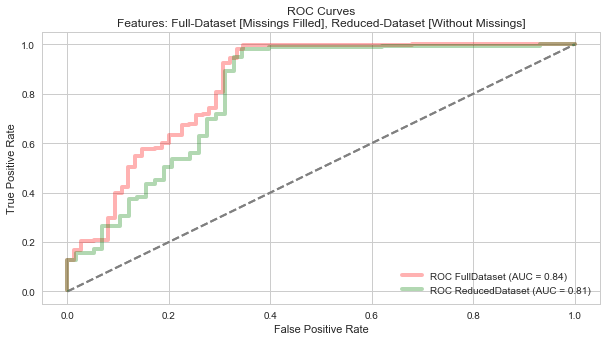

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score

plt.subplots(1, 1, figsize=(10, 5))

# Model1: FULL DATASET WITH MISSING VALUES FILLED

# read csv (comma separated value) into data
df=pd.read_csv('Loan_LRModel.csv')
df.columns


cat_vars=['Gender', 'Dependents', 'Self_Employed']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=df[to_keep]


y_data = data_final['Loan_Status']
vars =['Loan_Status','Loan_ID']
X_data = data_final.drop(vars, axis=1) 


#Divide X_data and y_data into train and test data
X_train, X_test, y_train,  y_test = train_test_split(X_data, y_data, test_size=0.30, random_state=0,
                                                                                      stratify= y_data, shuffle=True)


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

X_train.shape, X_test.shape


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
data_sc = sc.fit_transform(X_data) 


#Reduce dimension into 95% information
pca = PCA(0.95)
data_pca = pca.fit_transform(data_sc)


from sklearn.decomposition import PCA

pca = PCA(n_components=10)  
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test)
data_pca = pca.transform(X_data)


lr = LogisticRegression(C=0.10001, solver='newton-cg', n_jobs=-1, random_state=0)
lr.fit(X_train_pca, y_train)

y_pred_prob = lr.predict_proba(X_test_pca)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot([0,1],[0,1],linestyle = '--',lw = 2, color = 'gray')
plt.plot(fpr, tpr, lw=4, alpha=0.3, label='ROC FullDataset (AUC = %0.2f)' % ( roc_auc), color = 'red')


#Model2: REDUCED DATASET WITHOUT MISSING VALUES

# read csv (comma separated value) into data
df=pd.read_csv('LoanFree_LRModel.csv')
df.columns


cat_vars=['Gender', 'Dependents', 'Self_Employed']
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=df[to_keep]


y_data = data_final['Loan_Status']
vars =['Loan_Status','Loan_ID']
X_data = data_final.drop(vars, axis=1) 


#Divide X_data and y_data into train and test data
X_train, X_test, y_train,  y_test = train_test_split(X_data, y_data, test_size=0.30, random_state=0,
                                                                                      stratify= y_data, shuffle=True)


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

X_train.shape, X_test.shape


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
data_sc = sc.fit_transform(X_data) 


#Reduce dimension into 95% information
pca = PCA(0.95)
data_pca = pca.fit_transform(data_sc)


from sklearn.decomposition import PCA

pca = PCA(n_components=10)  
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test)
data_pca = pca.transform(X_data)


logreg = LogisticRegression(C=0.10001, solver='newton-cg', n_jobs=-1, random_state=0)
logreg.fit(X_train_pca, y_train)

y_pred_prob = logreg.predict_proba(X_test_pca)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot([0,1],[0,1],linestyle = '--',lw = 2, color = 'gray')
plt.plot(fpr, tpr, lw=4, alpha=0.3, label='ROC ReducedDataset (AUC = %0.2f)' % ( roc_auc), color = 'green')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves\nFeatures: Full-Dataset [Missings Filled], Reduced-Dataset [Without Missings]')
plt.legend(loc="lower right")
plt.show()

<hr>
By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; September 10, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>